In [2]:
%run /home/analysis_user/New_trap_code/Tools/basic_packages.py
#%matplotlib widget
# remove below if used
plt.rcParams["figure.figsize"] = (16,12)
plt.rcParams["font.size"] = 24
plt.rcParams['xtick.labelsize'] = "small"
plt.rcParams['ytick.labelsize'] = 36

In [141]:
height = load_dir_reduced_to_height("/home/data_transfer/data_from_windows/20200921/Bead1/Discharge/HeightControl2/","Discharge",max_files=2000)

  0%|          | 0/20 [00:00<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
img = np.load("/home/data_transfer/data_from_windows/20200921/Bead1/Discharge/HeightControl2/Pictures/Discharge_0.npy")
img2 = np.load("/home/data_transfer/data_from_windows/20200921/Bead1/Discharge/HeightControl2/Pictures/Discharge_875.npy")

plt.plot(np.mean(img,axis=1))
plt.plot(np.mean(img2,axis=1))

In [120]:
def load_reduced_lists(dirname,file_prefix,max_files,xfb=True,zfb = True,Iz=True,height=True,x_mean=True,y_mean=True,z_mean=True,qpd_sum=True):
    x_fb_list,z_fb_list, height_list,Iz_list,x_mean_list,y_mean_list,z_mean_list,qpd_sum_list= [ [] for x in range(8)]
    files = []
   
    [files.append(file_) for file_ in os.listdir(dirname) if file_.startswith(file_prefix) if file_.endswith('.h5')]
    files.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))        
    step_size = 100
    for j in tqdm(np.arange(0,max_files,step_size)):
        BDFs = [BDF.BeadDataFile(dirname+filename) for filename in files[j:j+step_size]]
        for k in range(len(BDFs)):
            if(xfb==True):
                x_fb_list.append(BDFs[k].feedback[0].mean())
            if(zfb==True):
                z_fb_list.append(BDFs[k].feedback[2].mean())
            if(Iz==True):
                Iz_list.append(au_to_power(BDFs[k].Iz.mean()))
            if(height==True):
                height_list.append(BDFs[k].bead_height)
            if(x_mean==True):
                x_mean_list.append(BDFs[k].x2.mean())
            if(y_mean==True):
                y_mean_list.append(BDFs[k].y2.mean())
            if(z_mean==True):
                z_mean_list.append(BDFs[k].z2.mean())
            if(qpd_sum==True):
                qpd_sum_list.append(BDFs[k].quad_sum.mean())                
    return x_fb_list,z_fb_list,Iz_list,height_list,x_mean_list,y_mean_list,z_mean_list,qpd_sum_list                                 
                                 

    

In [3]:
dirname="/home/data_transfer/data_from_windows/20200921/Bead1/Discharge/HeightControl2/"
file_prefix="Discharge"
#data_appleton =load_reduced_lists(dirname,file_prefix,10000,xfb=True,zfb = True,Iz=True,height=True,x_mean=True,y_mean=True,z_mean=True,qpd_sum=True)
data_appleton = np.load("appleton_reduced_lists.npy")

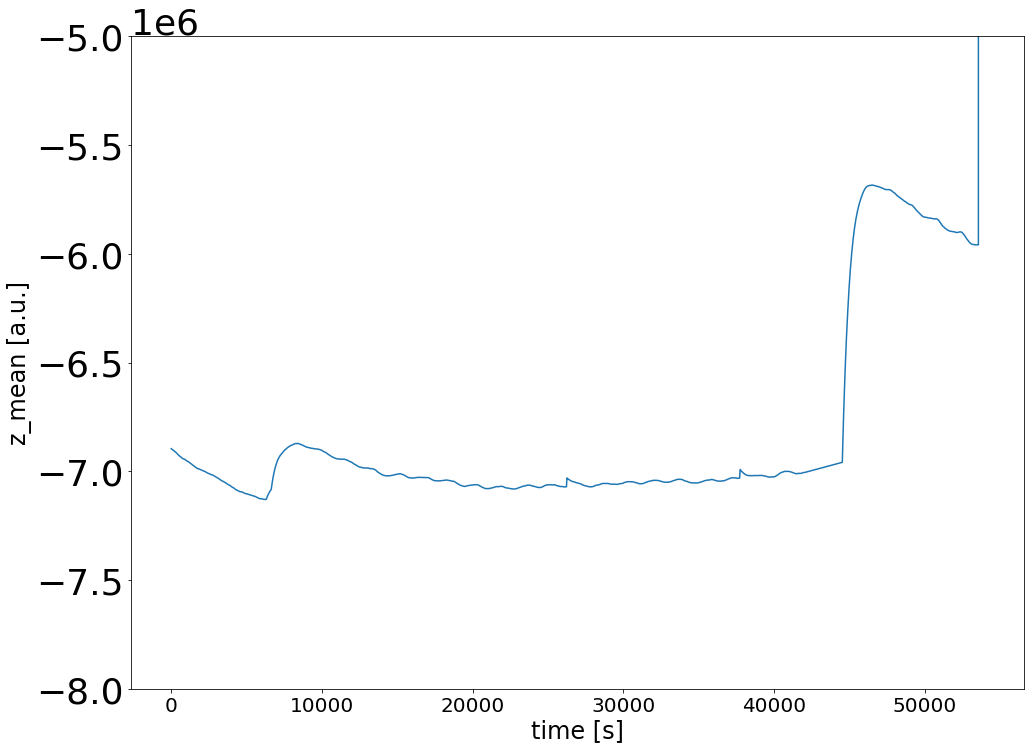

In [4]:
x=np.arange(0,30*len(data_appleton[3]),30)
#plt.xlim(40000,50000)
plt.xlabel("time [s]")

#plt.plot(x,data_appleton[0],label="xfb")
#plt.ylim(999.99,1000.001)
#plt.show()
#plt.plot(x,data_appleton[1],label="zfb")
#plt.ylim(-2500,-700)
#plt.ylabel("z_fb [a.u.]")
#plt.show()
#plt.plot(x,data_appleton[2],label="Iz",linestyle="",marker="*")

#plt.ylim(5.8,6.5)
#plt.ylabel("Power [mW]")
#plt.show()
#plt.plot(x,data_appleton[3],label="height",linestyle="",marker="*")
##plt.xlim(1398,1405)
#plt.ylabel("height [um]")
#plt.show()
#plt.plot(data_appleton[4],label="x")
#plt.ylim(-0.15,0.05)
#plt.ylabel("x_mean [a.u.]")
#plt.show()
#plt.plot(data_appleton[5],label="y")
#plt.ylim(0,0.2)
#plt.ylabel("y_mean [a.u.]")
#plt.show()
plt.plot(x,data_appleton[6],label="z")
plt.ylim(-0.8e7,-0.5e7)
plt.ylabel("z_mean [a.u.]")
plt.show()
#plt.plot(data_appleton[7],label="qpdsum")
#plt.ylim(1.1e9)
#plt.ylabel("QPD sum [a.u.]")
#plt.show()

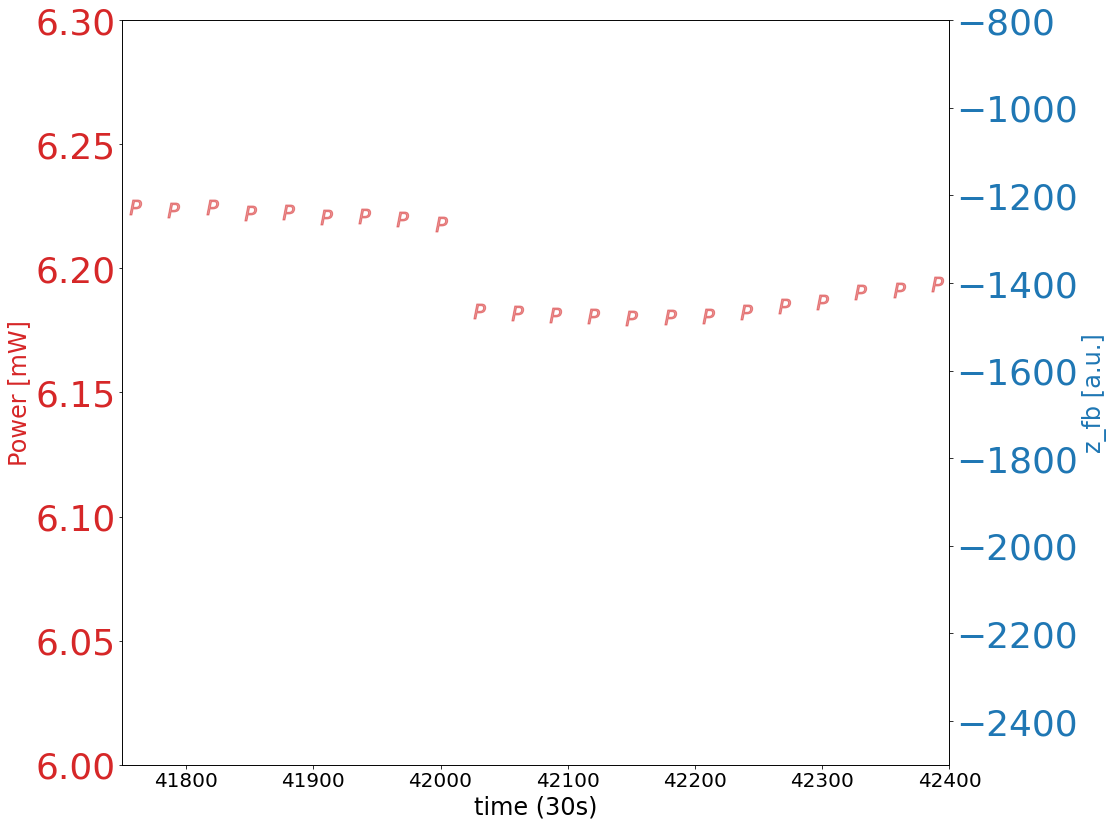

In [5]:
data1=data_appleton[2]
#data2=BDFs[1].xyz2[0]/BDFs[1].xyz2[0].mean()
data2=data_appleton[3]
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (30s)')
#ax1.set_xlim(131470,131520)
ax1.set_xlim(41750,42400)
ax1.set_ylim(6,6.3)
ax1.set_ylabel("Power [mW]", color=color)
ax1.plot(x,data1, color=color, alpha=0.5,linestyle="",marker="$P$",markersize=15)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel("z_fb [a.u.]", color=color)  # we already handled the x-label with ax1
ax2.set_ylim(-2500,-800)
ax2.plot(x,data2, color=color, alpha=0.5,linestyle="",marker="$Z$",markersize=15)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

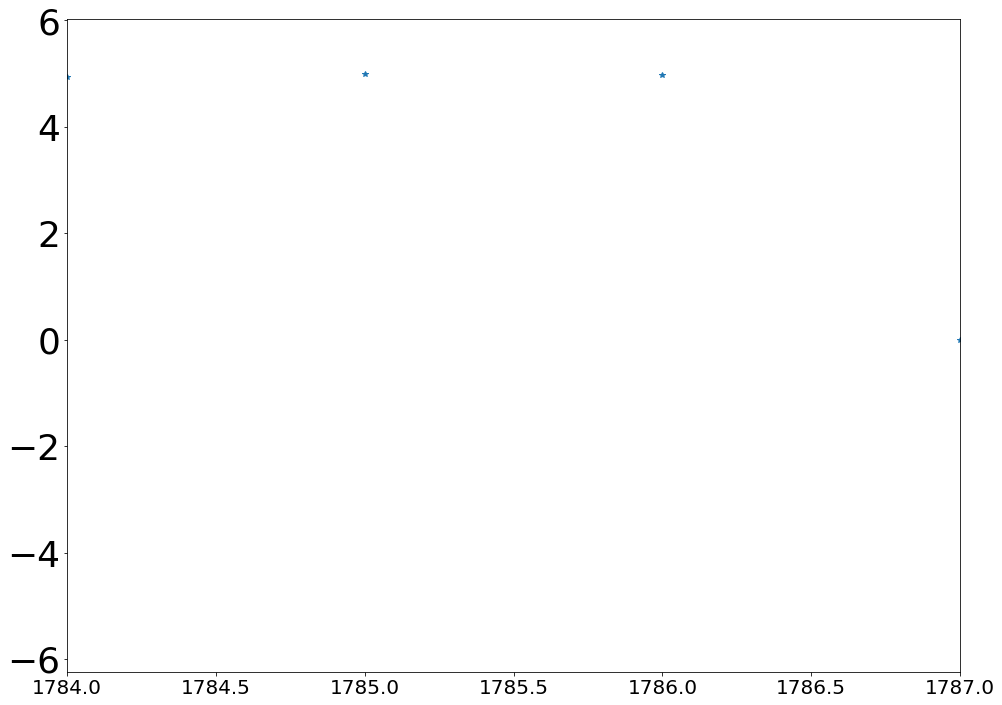

In [6]:
plt.plot(data_appleton[3],label="height",linestyle="",marker="*")
plt.xlim(1784,1787)
plt.show()

In [114]:
#filenames=["Discharge_1399.h5","Discharge_1400.h5","Discharge_1401.h5"] #big drop
filenames=["Discharge_1785.h5","Discharge_1786.h5","Discharge_1787.h5"] # death
BDFs = [BDF.BeadDataFile(dirname+filename) for filename in filenames]



In [222]:
BDFs[file].xyz2[1].mean()

-1.449710575793235

(2.1, 2.2)

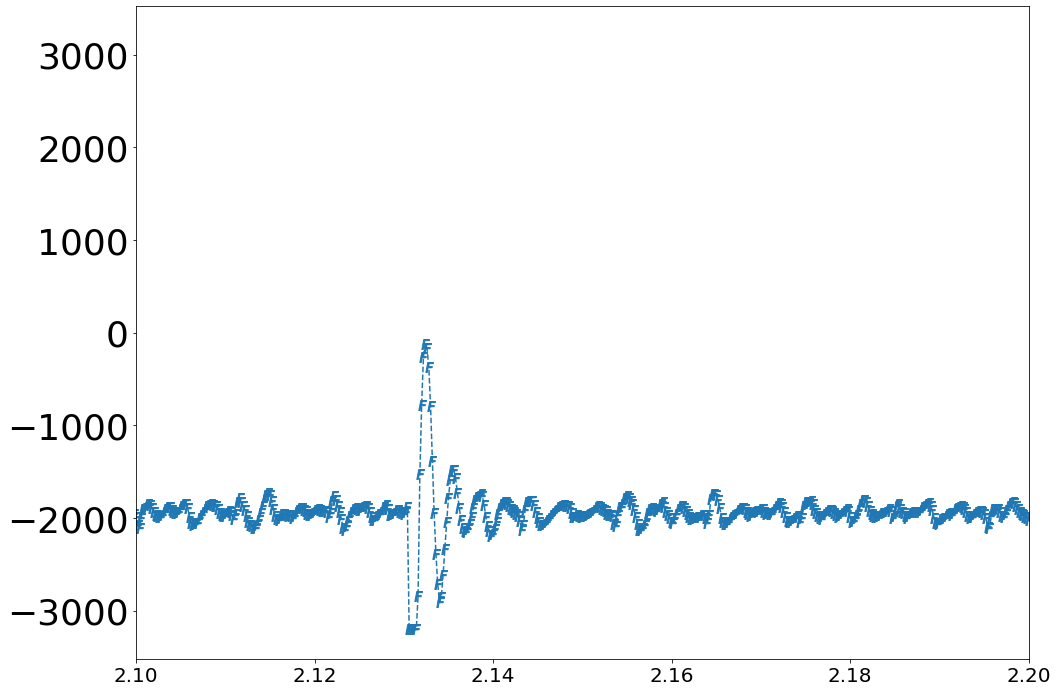

In [189]:
plt.plot(x2,BDFs[file].feedback[2],linestyle="--",marker="$F$",label="Z_FB",markersize=10)
plt.xlim(2.1,2.2)

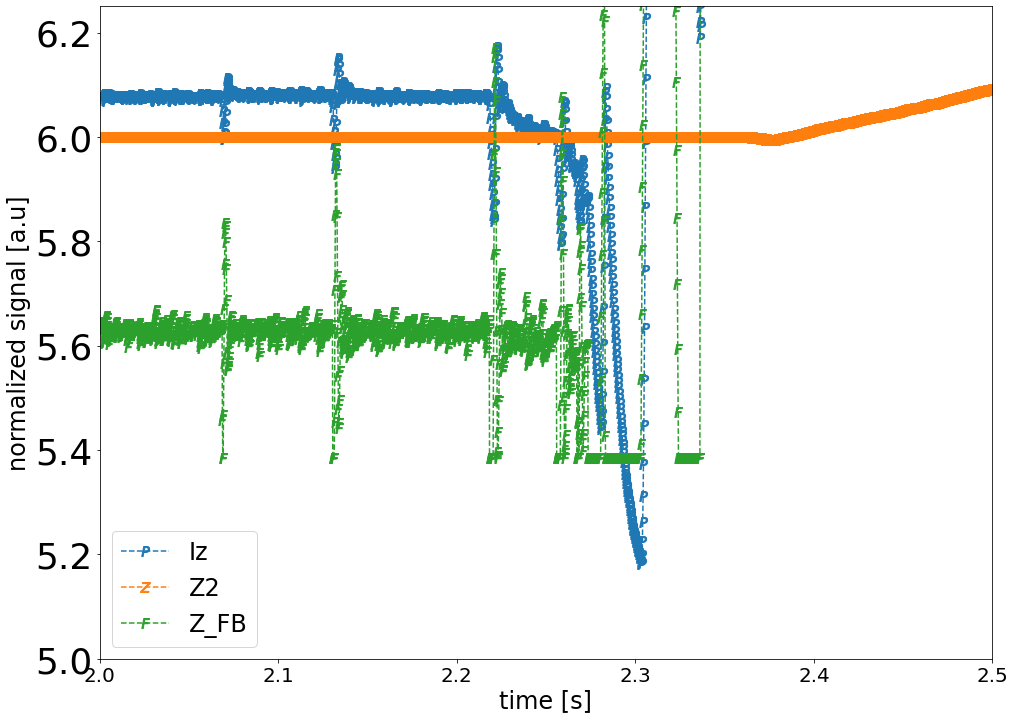

In [217]:
file = 1

x1 = np.arange(0,30,1/5000)
#plt.plot(x1,6+BDFs[file].xyz2[0],linestyle="--",marker="$X$",label="X2",markersize=10)
plt.plot(x1,au_to_power(BDFs[file].Iz),linestyle="--",marker="$P$",label="Iz",markersize=10)
plt.plot(x1,6+BDFs[file].xyz3[2]/1e9,linestyle="--",marker="$Z$",label="Z2",markersize=10)
plt.plot(x2,6+BDFs[file].feedback[2]/5200,linestyle="--",marker="$F$",label="Z_FB",markersize=10)

#plt.plot(x1,BDFs[file].quad_sum,linestyle="--",marker="$Z$")

#plt.plot(x1,BDFs[file].xyz2[0],linestyle="--",marker="$Z$")
plt.ylabel("normalized signal [a.u]")
plt.xlabel("time [s]")
plt.xlim(2,2.5)
plt.ylim(5,6.25)
#plt.yscale("log")
#plt.ylim(-0.07e8,0-5e6)
plt.legend()
plt.show()

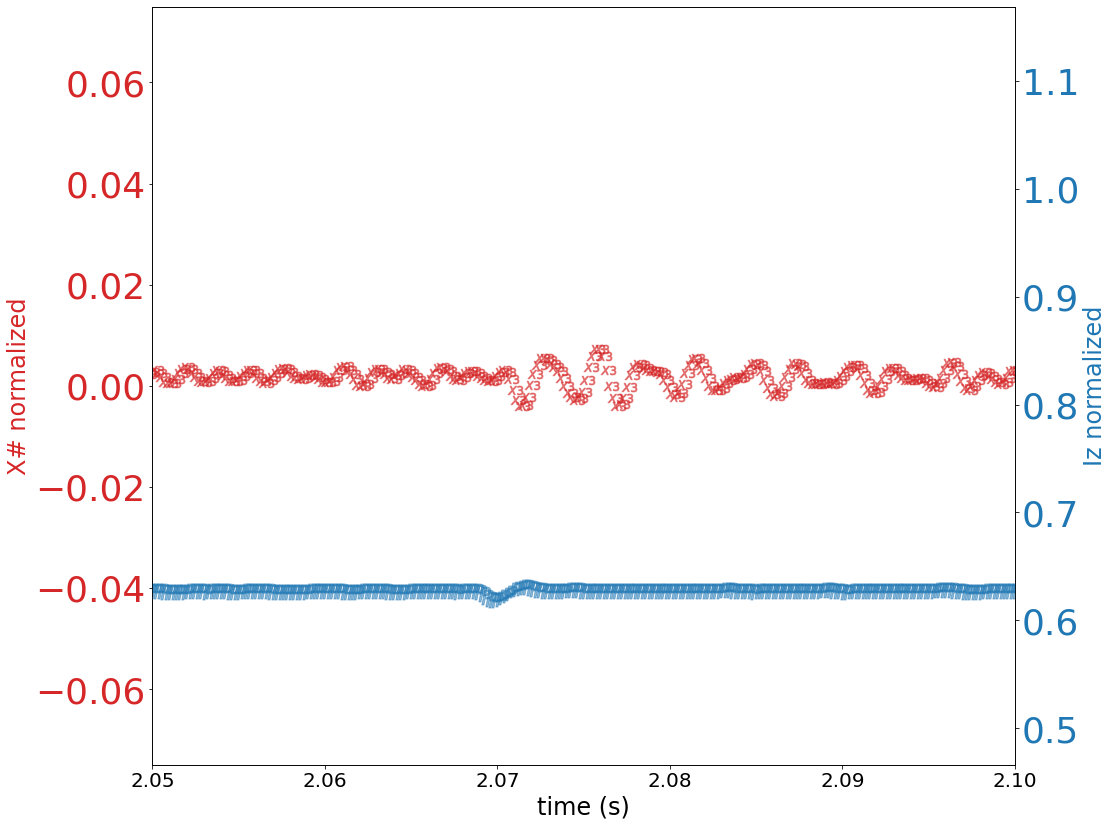

In [239]:
file = 1
trigger_delay =150000-len(BDFs[file].trigger[BDFs[file].trigger>0])
x1 = np.arange(0,30,1/5000)
x2 = np.arange(0-trigger_delay/5000,30-trigger_delay/5000,1/5000)

#data1=BDFs[file].xyz2[0]/BDFs[file].xyz2[0][0:5000].mean()
#data2=BDFs[1].xyz2[0]/BDFs[1].xyz2[0].mean()
data2=au_to_power(BDFs[file].Iz)/au_to_power(BDFs[file].Iz.mean())
#data1=BDFs[file].xyz2[2]/BDFs[file].xyz2[2].mean()
#data2=BDFs[file].quad_sum/BDFs[file].quad_sum[0:10000].mean()
data1=BDFs[file].x3/BDFs[file].x3.mean()
sync=True
fig, ax1 = plt.subplots()
color = 'tab:red'

ax1.set_xlabel('time (s)')
#ax1.set_xlim(26.295,26.305) # first drop
#plt.axvline(26.2975,color="black")
ax1.set_xlim(2.05,2.10)
#ax1.set_ylim(0,15)
ax1.set_ylabel("X# normalized", color=color)
ax1.plot(x1,data1, color=color, alpha=0.5,linestyle="",marker="$X3$",markersize=15)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(-0.075,0.075)


if(sync==False):
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color = 'tab:blue'
    ax2.set_ylabel('Z normalized', color=color)  # we already handled the x-label with ax1
    ax2.plot(x2,data2, color=color, alpha=0.5,linestyle="--",marker="$X$",markersize=15)
    ax2.tick_params(axis='y', labelcolor=color)

    
if(sync==True):
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color = 'tab:blue'
    ax2.set_ylabel('Iz normalized', color=color)  # we already handled the x-label with ax1
    ax2.plot(x1,data2, color=color, alpha=0.5,linestyle="",marker="$P$",markersize=15)
    ax2.tick_params(axis='y', labelcolor=color)
    #ax2.set_ylim(0,1.5)
    
    
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

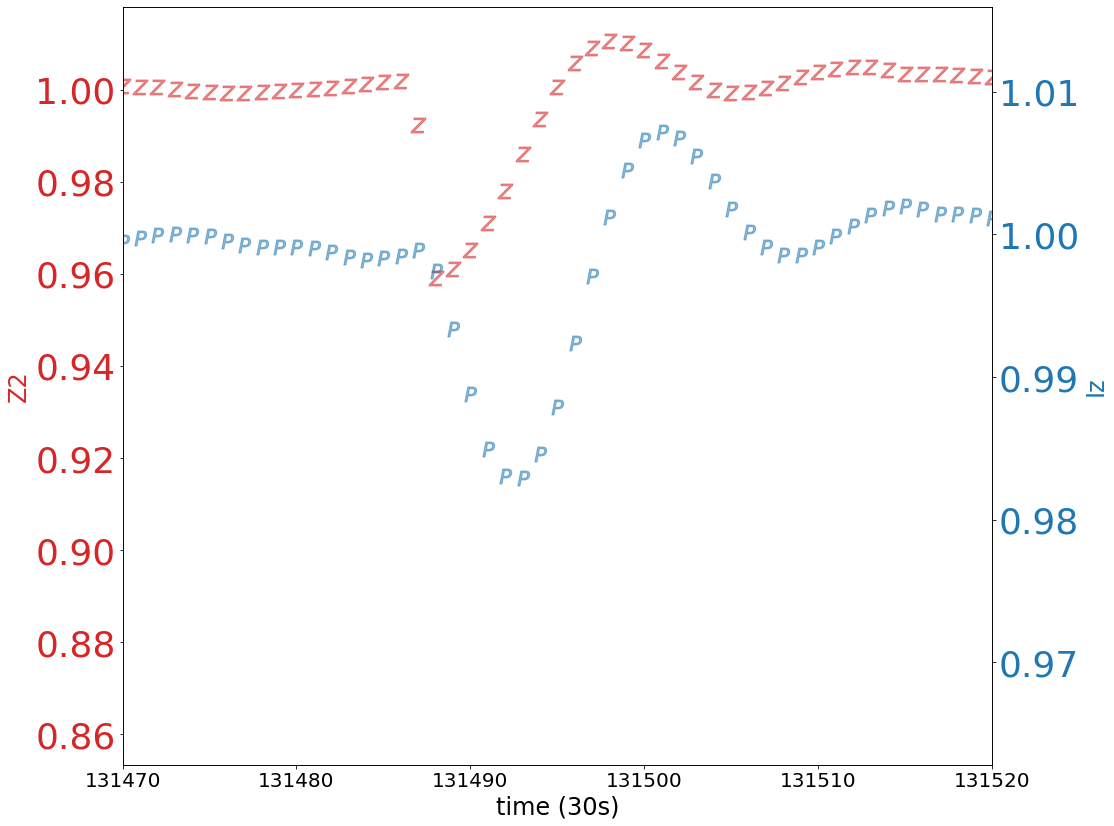

In [96]:
data1=BDFs[1].xyz2[2]/BDFs[1].xyz2[2].mean()
#data2=BDFs[1].xyz2[0]/BDFs[1].xyz2[0].mean()
data2=BDFs[1].Iz/BDFs[1].Iz.mean()


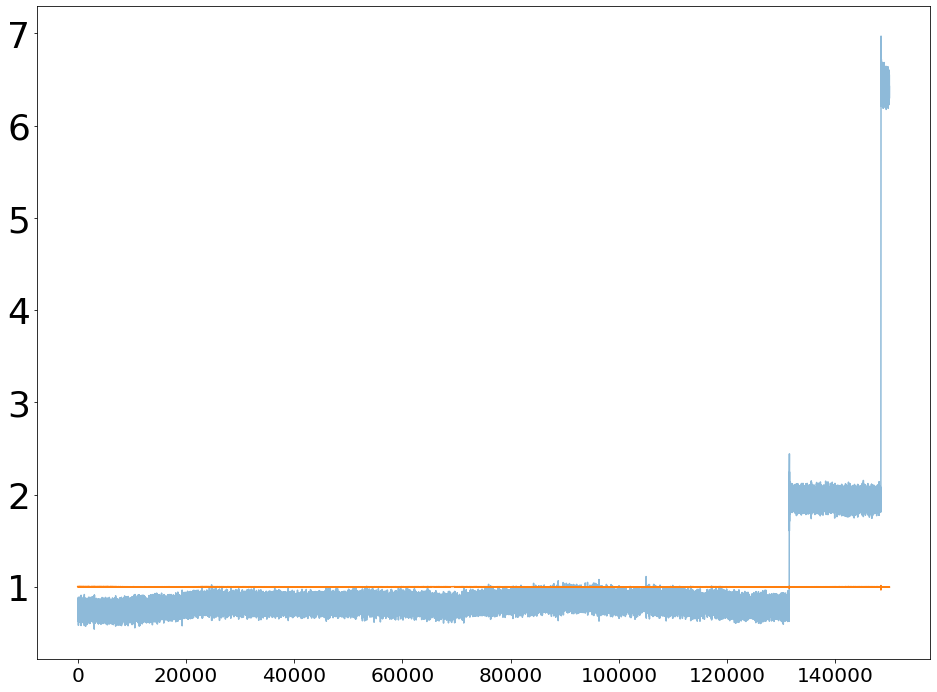

In [60]:
plt.plot(BDFs[1].xyz2[0]/BDFs[1].xyz2[0].mean(),alpha=0.5)
plt.plot(BDFs[1].Iz/BDFs[1].Iz.mean())


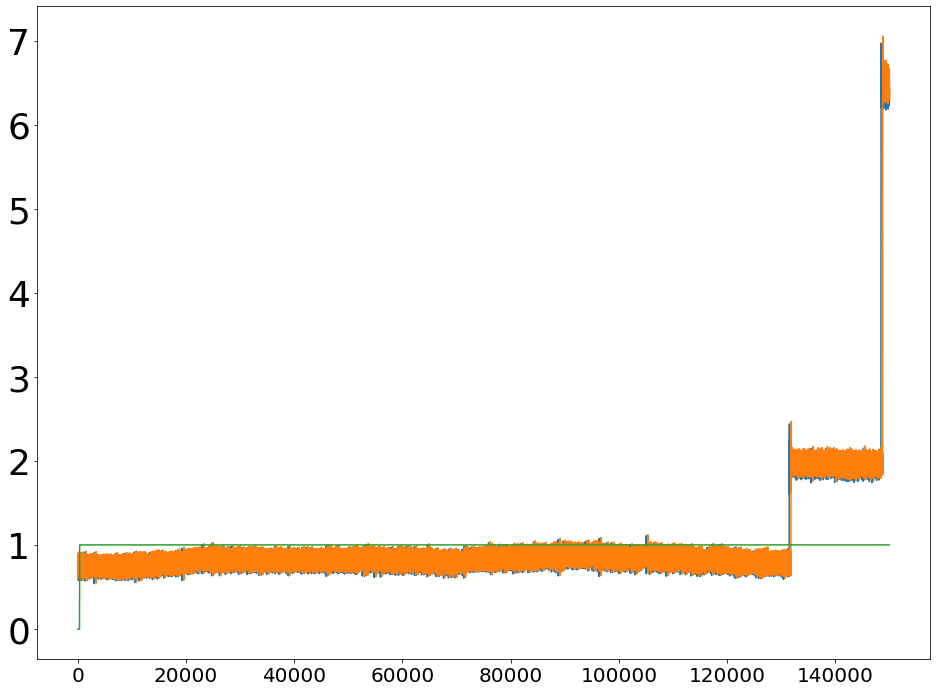

In [39]:
plt.plot(BDFs[1].xyz2[0]/BDFs[1].xyz2[0].mean())
plt.plot(BDFs[1].xyz[0]/BDFs[1].xyz[0].mean())
plt.plot(BDFs[1].trigger/BDFs[1].trigger.mean())
#plt.xlim(120e3,150e3)